In [ ]:
# Name: Changjun Zai
# ID: 1127473900
# Email: czai@usc.edu
# Date: May 01, 2022

In [1]:
import numpy as np
import os
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# data = np.load("/home/HW6/ph++ckpt/feature/dataset_mnist_TH1_0.005_.npz")
data = np.load('/content/drive/MyDrive/EE569/HW6/ph++ckpt/feature/dataset_fashion_mnist_TH1_0.005_.npz')

train_feature = data['train_feature']
train_label = data['train_label']
test_feature = data['test_feature']
test_label = data['test_label']

train_feature = np.squeeze(train_feature)
test_feature = np.squeeze(test_feature)

print(train_feature.shape,train_label.shape)
print(test_feature.shape,test_label.shape)

(60000, 70) (60000,)
(10000, 70) (10000,)


In [3]:
for key in data.keys():
    print(key)

train_feature
train_label
test_feature
test_label
train_feature_1
train_feature_2


In [4]:
data['train_feature'].shape,data['train_feature_1'].shape,data['train_feature_2'].shape

((60000, 70), (100, 28, 28, 23), (100, 10, 10, 59))

In [5]:
# tr_acc = [] # change some parameters to see whether final accuracy changes
# te_acc = []
import time

t0 = time.time()

model = xgb.XGBClassifier(n_jobs=-1,
                    objective='multi:softprob',
#                     tree_method='gpu_hist', gpu_id=0,
                    max_depth=6,n_estimators=100,
                    min_child_weight=5,gamma=5,
                    subsample=0.8,learning_rate=0.1,
                    nthread=8,colsample_bytree=1.0)

model.fit(train_feature,train_label)
train_predict = model.predict(train_feature)
test_predict = model.predict(test_feature)
# clf.score(train_hop3_feats,y_test)
t1 = time.time()
print(t1-t0)

430.3500666618347


In [6]:
from sklearn.metrics import accuracy_score

print("train accuracy",accuracy_score(train_label,train_predict))
print("test accuracy",accuracy_score(test_label,test_predict))

train accuracy 0.90695
test accuracy 0.8561


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


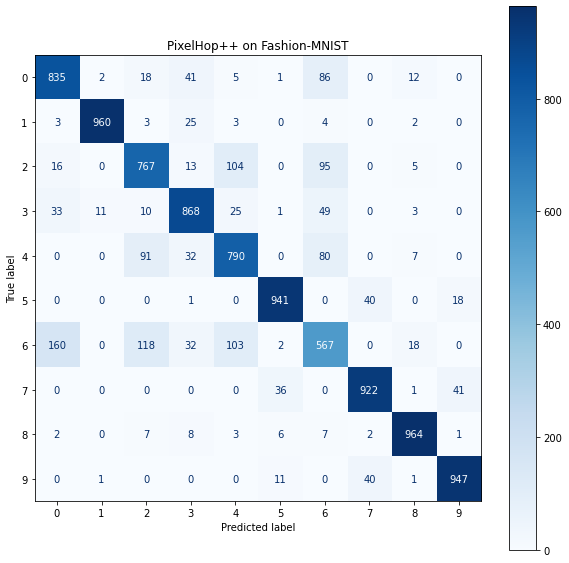

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(model,test_feature,test_label,normalize =None, cmap=plt.cm.Blues, ax=ax)
# plt.show()
plt.title("PixelHop++ on Fashion-MNIST")
plt.savefig('/content/drive/MyDrive/EE569/HW6/figure/ph++_fashionmnist_num.jpg')

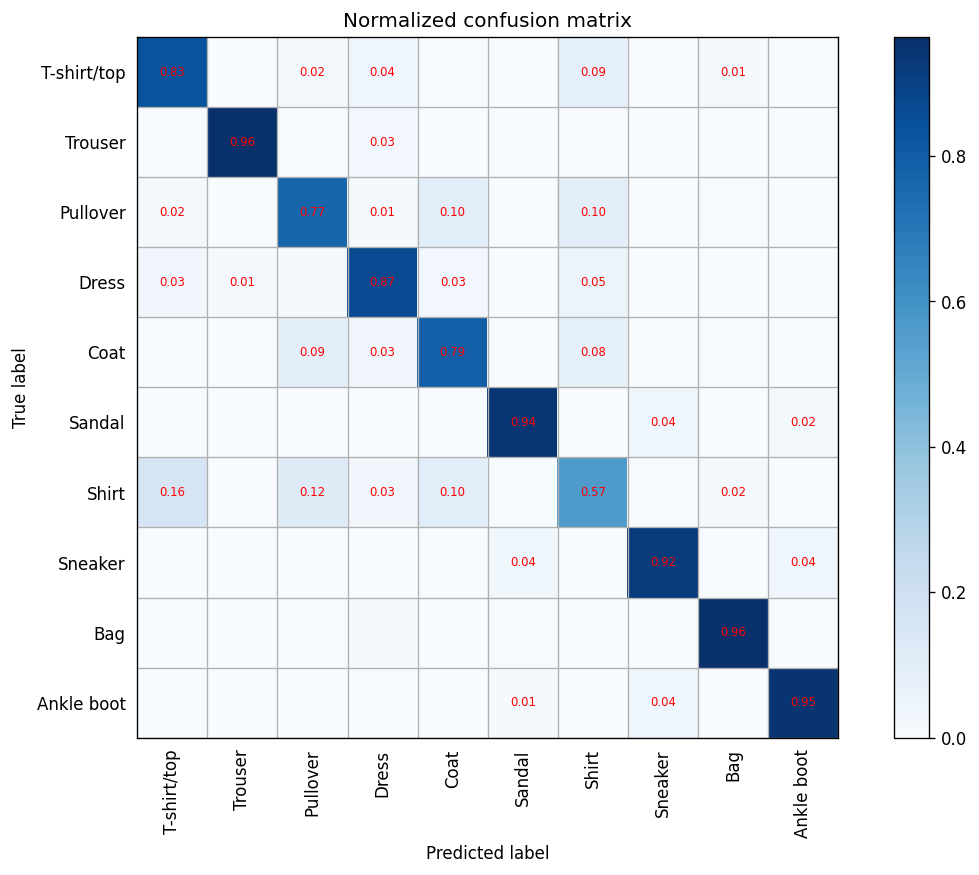

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

y_true = test_label
y_pred = test_predict

tick_marks = np.array(range(len(labels))) + 0.5

def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.binary):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(labels)))
    plt.xticks(xlocations, labels, rotation=90)
    plt.yticks(xlocations, labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(12, 8), dpi=120)

ind_array = np.arange(len(labels))
x, y = np.meshgrid(ind_array, ind_array)

for x_val, y_val in zip(x.flatten(), y.flatten()):
    c = cm_normalized[y_val][x_val]
    if c > 0.01:
        plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=7, va='center', ha='center')
# offset the tick
plt.gca().set_xticks(tick_marks, minor=True)
plt.gca().set_yticks(tick_marks, minor=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.grid(True, which='minor', linestyle='-')
plt.gcf().subplots_adjust(bottom=0.15)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix', cmap=plt.cm.Blues)
# show confusion matrix
plt.savefig('/content/drive/MyDrive/EE569/HW6/figure/ph++_fashionmnist_num.jpg')
plt.show()

In [8]:
M = confusion_matrix(test_label,test_predict,normalize='true')

In [9]:
import pandas as pd 
#pd.DataFrame(M).to_csv("MNIST.csv")
pd.DataFrame(M).to_csv("FashionMNIST.csv")

In [10]:
acc = []
for i in range(10):
    acc.append(M[i,i])

In [11]:
label = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [12]:
np.argmax(acc),acc

(8, [0.835, 0.96, 0.767, 0.868, 0.79, 0.941, 0.567, 0.922, 0.964, 0.947])

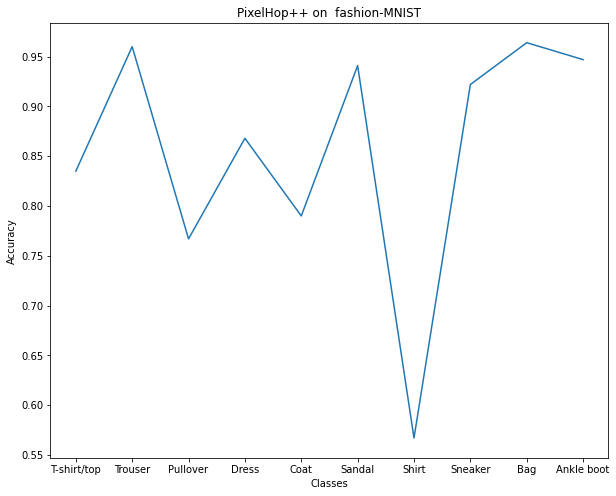

In [15]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot([i for i in range(10)],[0.835, 0.96, 0.767, 0.868, 0.79, 0.941, 0.567, 0.922, 0.964, 0.947])
plt.xticks([i for i in range(len(acc))])
plt.xlabel("Classes")
plt.ylabel("Accuracy")
plt.xticks([i for i in range(10)],label,rotation = 0)
plt.title("PixelHop++ on  fashion-MNIST")
plt.savefig("/content/drive/MyDrive/EE569/HW6/figure/ph++fashion_mn_class.jpg")

In [14]:
test_label
test_predict
index = []
for i in range(len(test_label)):
    if(test_label[i] == 9 and test_predict[i] == 4):
        index.append(i)

In [16]:
from tensorflow.keras.datasets import mnist,cifar10,fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [17]:
x_wrong = x_test[index,:,:,:]
x_wrong = np.squeeze(x_wrong)
x_wrong.shape

(0, 28, 28)

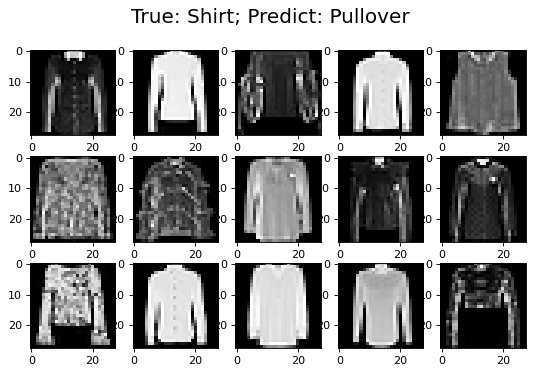

In [21]:
test_label
test_predict
index = []
for i in range(len(test_label)):
    if(test_label[i] == 6 and test_predict[i] == 2):
        index.append(i)
        
x_wrong = x_test[index,:,:,:]
x_wrong = np.squeeze(x_wrong)
x_wrong.shape

fig=plt.figure(figsize=(8, 5), dpi=80)
for i in range(1,16):
    ax=fig.add_subplot(3,5,i)   
    ax.imshow(x_wrong[i], cmap='gray')
    
fig.suptitle('True: Shirt; Predict: Pullover',fontsize=18) # or plt.suptitle('Main title')
# plt.show()
#fig.savefig("Mnist_T4P9.jpg")
#fig.savefig("/content/drive/MyDrive/EE569/HW6/figure/fashion_Mnist_T_{}_P_{}.jpg".format(label[true],label[pred]))
fig.savefig("/content/drive/MyDrive/EE569/HW6/figure/fashion_Mnist_T_6_P_2.jpg")

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

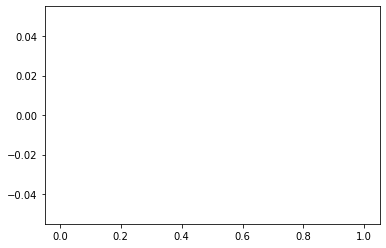

In [18]:
plt.hist(test_predict[index])

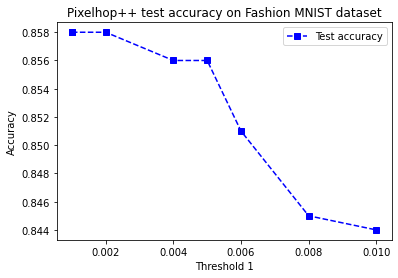

In [19]:
th = []
acc = []
with open('/content/drive/MyDrive/EE569/HW6/ph++ckpt/fashion_mnist_test_acc.txt', 'r') as f:
    data = f.readlines()
for item in data:
    th.append(float(item.split('---')[0]))
    acc.append(float(item.split('---')[1][:-2]))
    
plt.plot(th,acc, 'bs--', label = 'Test accuracy')
# plt.plot(emotion_6,'go-',label = 'Emotion 6')
# plt.plot(layers,[stack_emo[0] for _ in layers], 'k--')#, label = 'baseline accuracy')
plt.legend()
# plt.text(4, 81.07, "baseline", fontsize=16)
# plt.xticks([1,2,3,4,5])
plt.xlabel('Threshold 1')
plt.ylabel("Accuracy")
plt.title("Pixelhop++ test accuracy on Fashion MNIST dataset")
plt.savefig('/content/drive/MyDrive/EE569/HW6/figure/ph++fashionmnist.jpg')

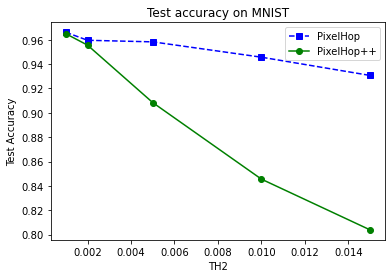

In [ ]:
import matplotlib.pyplot as plt
x = [0.001,0.002,0.005,0.01,0.015]
acc_mnist = [0.9662,0.9596,0.9583,0.9457,0.9307]
acc_mnist__ =  [0.965,0.9556,0.9084,0.8455,0.8038]

plt.plot(x,acc_mnist, 'bs--', label = 'PixelHop')
plt.plot(x,acc_mnist__,'go-',label = 'PixelHop++')
# plt.plot(layers,[stack_emo[0] for _ in layers], 'k--')#, label = 'baseline accuracy')
plt.legend()
# plt.xticks(x)
plt.xlabel("TH2")
plt.ylabel("Test Accuracy")
plt.title("Test accuracy on MNIST")
plt.savefig('compare1.jpg')

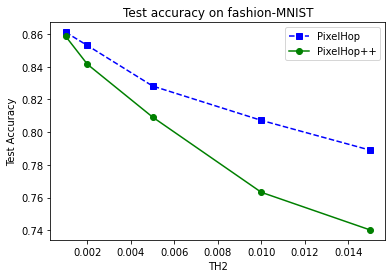

In [20]:
x = [0.001,0.002,0.005,0.01,0.015]
acc_fmnist = [0.8611,0.8530,0.8282,0.8072,0.7890]
acc_fmnist__ =  [0.8586,0.8415,0.8092,0.7632,0.7402]

plt.plot(x,acc_fmnist, 'bs--', label = 'PixelHop')
plt.plot(x,acc_fmnist__,'go-',label = 'PixelHop++')
# plt.plot(layers,[stack_emo[0] for _ in layers], 'k--')#, label = 'baseline accuracy')
plt.legend()
plt.xlabel("TH2")
plt.ylabel("Test Accuracy")
plt.title("Test accuracy on fashion-MNIST")
plt.savefig('/content/drive/MyDrive/EE569/HW6/figure/compareFASHIONMNIST.jpg')